In [87]:
import pandas as pd


spotify = pd.read_csv("./spotify_songs.csv")
spotify.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [88]:
spotify["key"].value_counts()

key
1     4010
0     3454
7     3352
9     3027
11    2996
2     2827
5     2680
6     2670
8     2430
10    2273
4     2201
3      913
Name: count, dtype: int64

In [41]:
# Calculate the correlation between danceability and track_popularity
correlation = spotify['danceability'].corr(spotify['track_popularity'])

# Print the correlation value
print(f"Correlation between danceability and track_popularity is: {correlation}")

# Create bins for danceability
spotify['danceability_bins'] = pd.cut(spotify['danceability'], bins=10, include_lowest=True)

# Calculating the mean popularity for each bin
mean_popularity = spotify.groupby('danceability_bins', observed=False)['track_popularity'].mean()


Correlation between danceability and track_popularity is: 0.06474767126121224


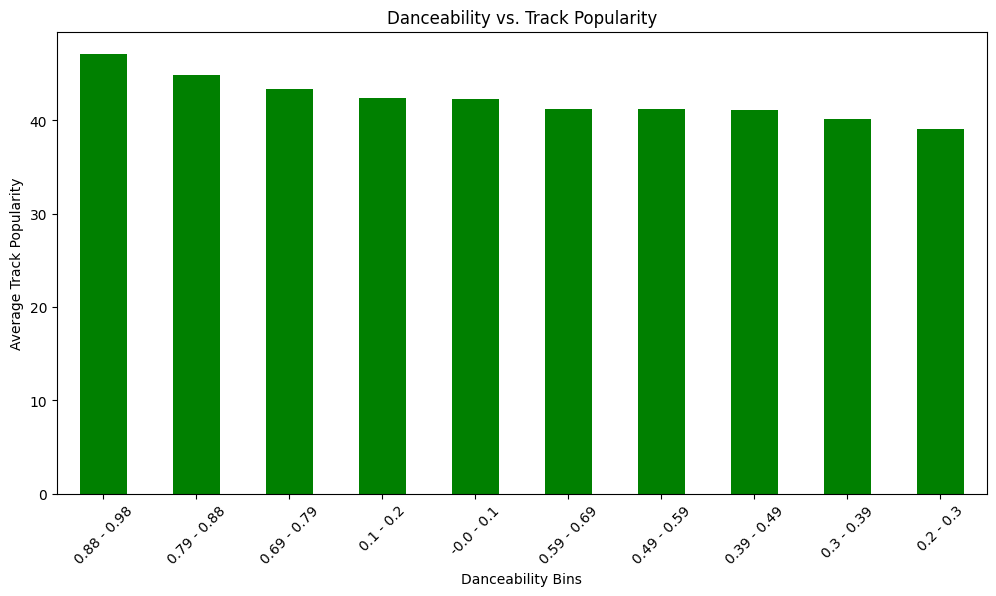

In [84]:
# Create a bar plot to visualize the relationship with labels for bins using Pandas' built-in plotting capabilities
ax = mean_popularity.plot(kind='bar', color='green', figsize=(12, 6), title='Danceability vs. Track Popularity', xlabel='Danceability Bins', ylabel='Average Track Popularity')

# Create custom labels for the bins based on the actual ranges in the dataset
bin_labels = [f'{round(interval.left, 2)} - {round(interval.right, 2)}' for interval in mean_popularity.index]

# Set these labels as the x-axis labels
_ = ax.set_xticklabels(bin_labels, rotation=45)


In [44]:
# Convert the track_album_release_date to datetime format
spotify['track_album_release_date'] = pd.to_datetime(spotify['track_album_release_date'], errors='coerce')

# Extract the year from the release date
spotify['year'] = spotify['track_album_release_date'].dt.year

# Calculate the mean values of danceability, energy, and loudness for each year
yearly_trends = spotify.groupby('year')[['danceability', 'energy', 'loudness']].mean()

print("Here are the average values of danceability, energy, and loudness for each year:")
yearly_trends

Here are the average values of danceability, energy, and loudness for each year:


,danceability,energy,loudness
year,,,
1957.0,0.565000,0.962000,-2.981000
1958.0,0.647000,0.582000,-9.538000
1961.0,0.585000,0.036000,-14.145000
1963.0,0.511500,0.512750,-13.000250
1964.0,0.570125,0.793250,-6.676250
...,...,...,...
2016.0,0.650420,0.696062,-6.237900
2017.0,0.663182,0.682697,-6.430275
2018.0,0.678906,0.674790,-6.552025


<Axes: title={'center': 'Trends in Music Styles Over the Years'}, xlabel='Year', ylabel='Average Value'>

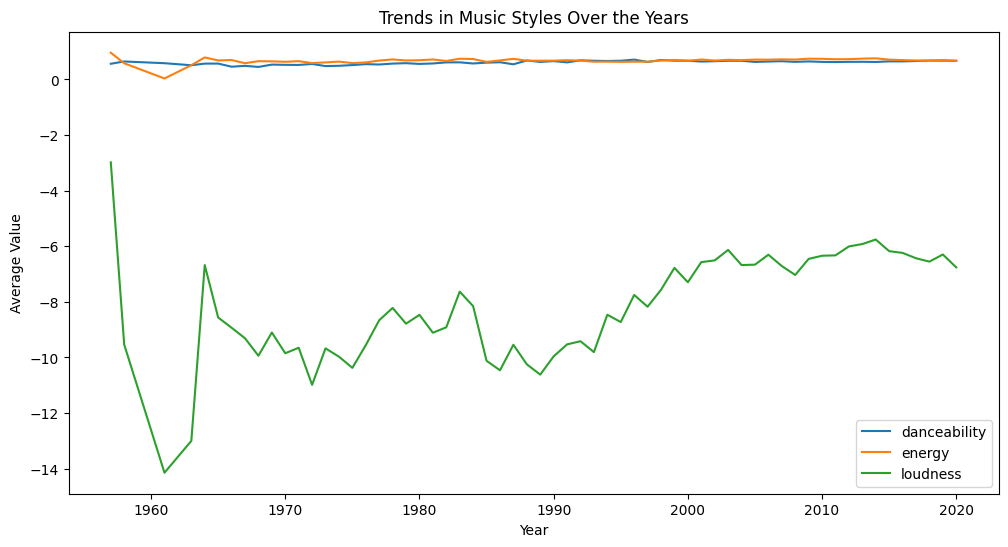

In [46]:
# Create line plots to visualize the trends over the years using Pandas' built-in plotting capabilities
yearly_trends.plot(kind='line', figsize=(12, 6), title='Trends in Music Styles Over the Years', xlabel='Year', ylabel='Average Value')